In [21]:
import pandas as pd

train_data = pd.read_csv('train.csv', encoding='latin1')
test_data = pd.read_csv('test.csv', encoding='latin1')

train_tweet = train_data.SentimentText
train_labels = train_data.Sentiment

test_tweet = test_data.SentimentText


<h3>Токенизируем слова</h3>

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_tweet)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_tweet)
data = pad_sequences(sequences)

test_sequences = tokenizer.texts_to_sequences(test_tweet)
test_data = pad_sequences(test_sequences)
labels = np.asarray(train_labels)

<h3>Делим данные на тренировочные, валидационные и тестовые</h3>

In [40]:
x_train = data[:70000]
y_train = labels[:70000]

x_val = data[70000:80000]
y_val = labels[70000:80000]
embedding_dim=100

x_test = data[80000:]
y_test = labels[80000:]

In [41]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

ndim=2

a=ndim

model = Sequential()
model.add(Embedding(106612, 64, input_length=151))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 151, 64)           6823168   
_________________________________________________________________
flatten_9 (Flatten)          (None, 9664)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                309280    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 7,132,481
Trainable params: 7,132,481
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [43]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=10,
                    validation_data=(x_val, y_val))

Train on 70000 samples, validate on 10000 samples
Epoch 1/10
70000/70000 [==============================] - 41s 590us/step - loss: 0.5371 - acc: 0.7307 - val_loss: 0.5095 - val_acc: 0.7566
Epoch 2/10
70000/70000 [==============================] - 43s 614us/step - loss: 0.5171 - acc: 0.7569 - val_loss: 0.5205 - val_acc: 0.7517
Epoch 3/10
70000/70000 [==============================] - 42s 604us/step - loss: 0.5167 - acc: 0.7609 - val_loss: 0.5239 - val_acc: 0.7383
Epoch 4/10
70000/70000 [==============================] - 42s 602us/step - loss: 0.5219 - acc: 0.7625 - val_loss: 0.5351 - val_acc: 0.7609
Epoch 5/10
70000/70000 [==============================] - 42s 593us/step - loss: 0.5300 - acc: 0.7639 - val_loss: 0.5645 - val_acc: 0.7356
Epoch 6/10
70000/70000 [==============================] - 41s 582us/step - loss: 0.5342 - acc: 0.7655 - val_loss: 0.5659 - val_acc: 0.7469
Epoch 7/10
70000/70000 [==============================] - 41s 582us/step - loss: 0.5407 - acc: 0.7681 - val_loss: 0.

In [26]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

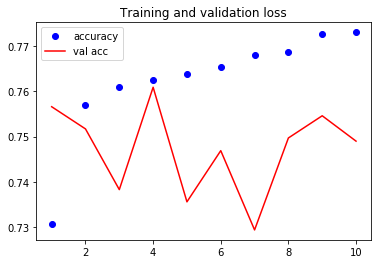

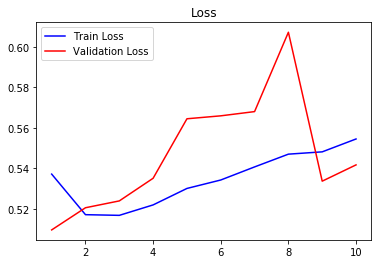

In [46]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, acc, 'bo', label='accuracy')
plt.plot(epochs, val_acc, 'r', label='val acc')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
# plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.title('Loss')
plt.legend()

<h3>Сохраняем веса</h3>

In [50]:
model.save_weights('pre_trained_model.h5')

<h3>Делаем предсказание на тестовых данных и ассоциируем полученные данные с переменной prediction</h3>

In [47]:
prediction = model.predict(test_data)

299989

<h3>Записываем результаты предсказания и тестовые твиты в .csv файл</h3>

In [52]:
a = pd.DataFrame(prediction)
b = pd.DataFrame(test_tweet)
a = a.assign(tweet = b.SentimentText)
a.to_csv('prediction.csv')

In [ ]:
<h3>

In [54]:
model.evaluate(x_val, y_test)

19989/19989 [==============================] - 1s 47us/step


[0.550644808060602, 0.7430586822931426]